In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data = pd.read_csv("../data/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we can see there few data for columns like glucose , insulin , skin thickness , bmi and blood pressure which have value 0. That's not possible. So we can either remove them or replace it with their respective mean values. Let's to the latter.

In [7]:
data["BloodPressure"]= data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data["Glucose"]= data['Glucose'].replace(0,data['Glucose'].mean())
data["BMI"]= data['BMI'].replace(0,data['BMI'].mean())
data["Insulin"]= data['Insulin'].replace(0,data['Insulin'].mean())
data["SkinThickness"]= data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


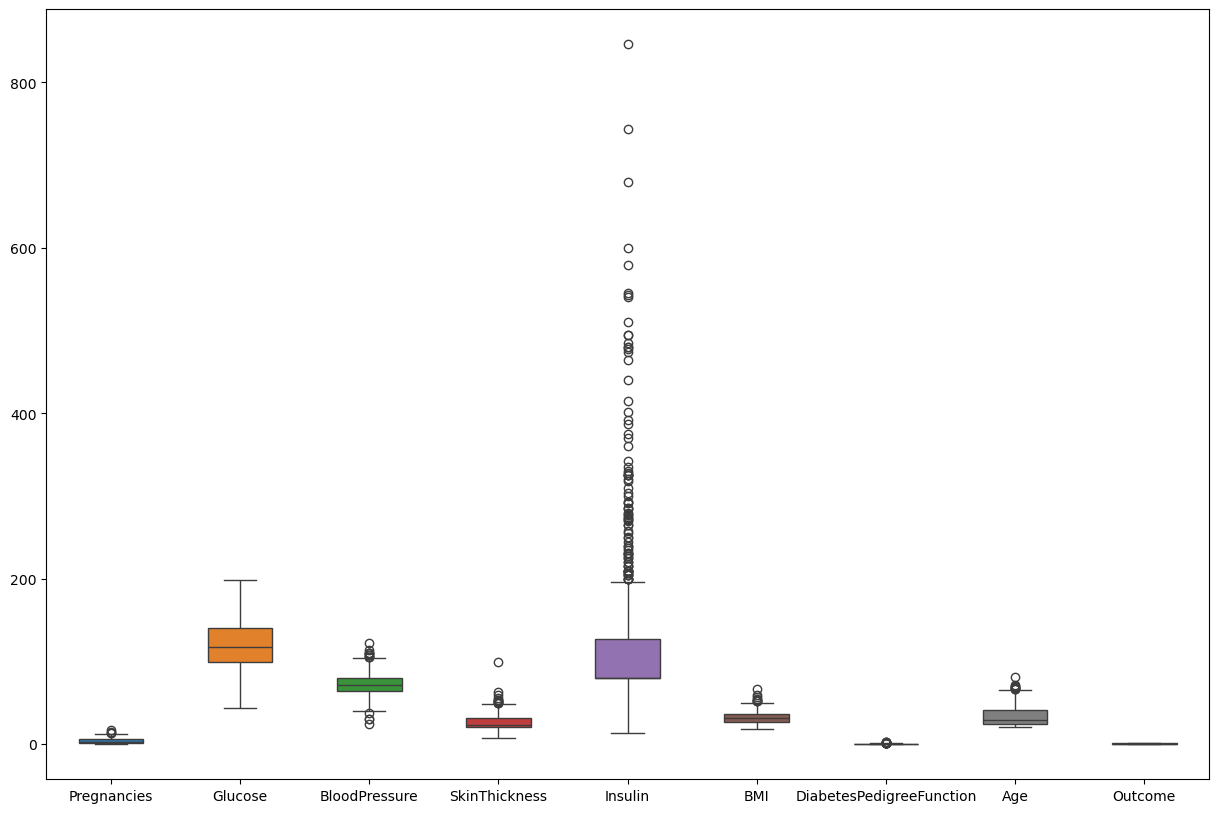

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data,width=0.5)
plt.show()

In [10]:
# handling outliers

def handle_outliers(df):
    df_clean=df.copy()
    for i in df_clean.columns:
        q1 = df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        lower_bount=q1-1.5*IQR
        upper_bound=q3+1.5*IQR
        df_clean=df_clean[(df_clean[i]>lower_bount) & (df_clean[i]<upper_bound)]
    return df_clean

In [11]:
df= handle_outliers(data)

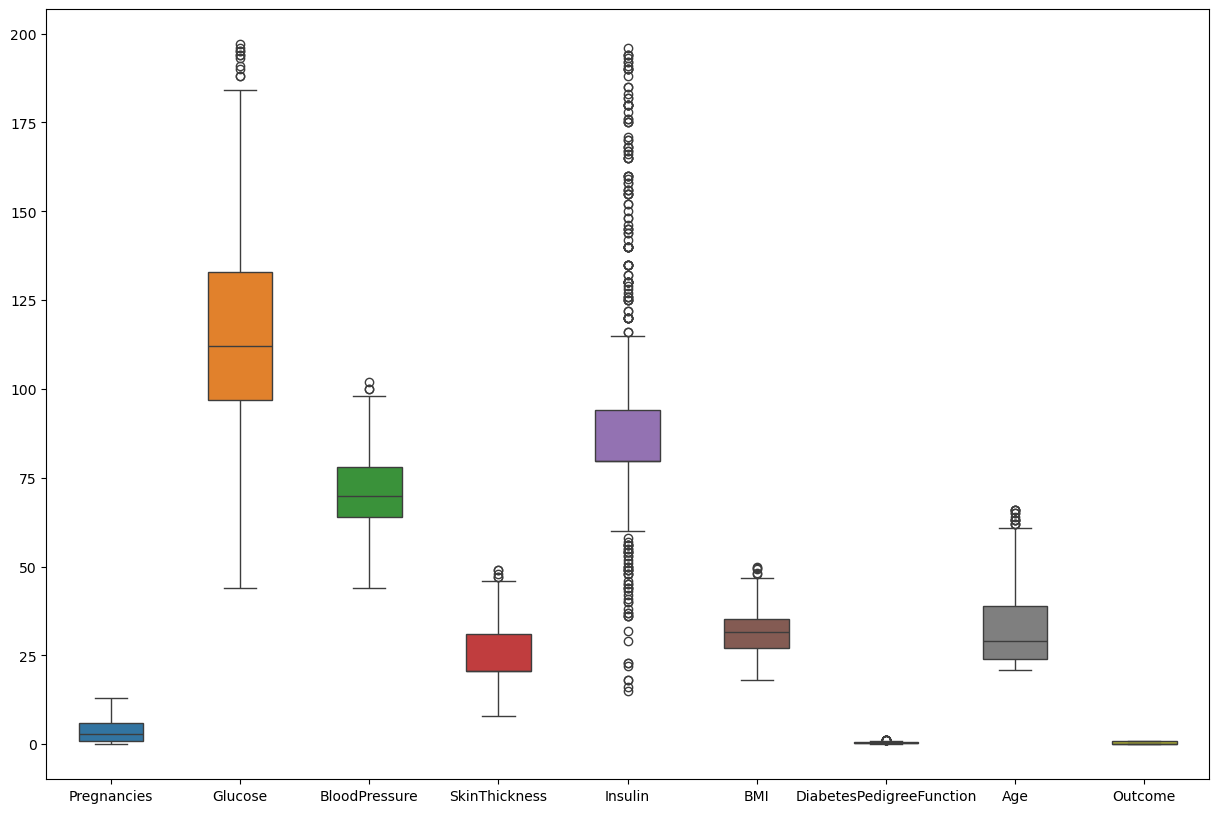

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,width=0.5)
plt.show()

In [14]:
# divide into dependent and independent variables

X=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [15]:
# seperate dataset into train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.25)
X_train.shape , X_test.shape 

((462, 8), (155, 8))

In [18]:
import pickle 
from sklearn.preprocessing import StandardScaler
## standard scaling - standarization

def scaler_standard(X_train,X_test):
    scaler= StandardScaler()
    
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    
    # saving model
    file = open('../model/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

In [19]:
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

In [20]:
X_train_scaled

array([[-1.19406208, -0.57976017, -0.72715814, ..., -1.72120883,
        -0.66544229, -1.06581458],
       [-1.19406208,  0.74930525, -1.09818099, ...,  0.45122866,
         0.47399656, -1.06581458],
       [-0.88995145, -1.37001528, -1.09818099, ...,  1.87289731,
         1.05583767, -0.87982541],
       ...,
       [-0.88995145,  0.13486506, -0.35613529, ...,  0.03590973,
        -0.11188512, -0.97282   ],
       [ 0.02238044, -1.19041184,  1.68449039, ...,  1.23394511,
        -1.04121468, -0.69383624],
       [ 0.02238044,  2.00652929, -0.17062386, ..., -0.33148779,
        -0.22502089,  0.05012046]])

In [21]:
X_test_scaled

array([[ 0.32649107, -0.65160154,  0.20039899, ..., -0.44330443,
        -0.86342989, -0.04287413],
       [-0.28173019,  0.46193975,  0.57142184, ..., -0.53914726,
        -0.3785623 ,  0.14311505],
       [-0.88995145,  0.31825701, -1.46920385, ..., -0.49122584,
         1.55282695, -1.06581458],
       ...,
       [-1.19406208, -0.43607742, -0.35613529, ..., -1.88094688,
        -0.73009131, -0.97282   ],
       [-0.28173019, -2.01658764,  0.94244469, ...,  0.41928105,
        -0.70180736,  1.25905009],
       [-0.28173019, -0.14871192, -2.02573812, ..., -0.3634354 ,
         0.84572838, -0.69383624]])

In [22]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
## Hyper parameters tuning
# Gridsearch cv

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

params={
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7), # takes best c from -3 to 3
    'solver':['newton-cg','lbfgs','liblinear']
}  


In [24]:
logreg=LogisticRegression()
clf= GridSearchCV(logreg,param_grid=params,scoring='accuracy',cv=10)

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [26]:
clf.best_score_

0.7642460684551342

In [27]:
y_pred=clf.predict(X_test_scaled)

In [29]:
conf_mat= confusion_matrix(y_test,y_pred)

conf_mat

array([[106,   7],
       [ 15,  27]], dtype=int64)

🎯 Correct Approach (Straight to GridSearchCV)

You do not need to fit a logistic regression first.

Instead, you can go straight to GridSearchCV — it:

    Tries different combinations of hyperparameters.

    Trains a logistic regression model for each combination (on training data).

    Picks the best one using cross-validation.

    Returns the best estimator, which you can use directly for predictions.


Typical flow

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Define the model
model = LogisticRegression()

# 2. Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Important when using 'l1'
}

# 3. Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# 4. Fit on training data
grid_search.fit(X_train, y_train)

# 5. Best model
best_model = grid_search.best_estimator_

# 6. Predict using best model
predictions = best_model.predict(X_test)

```

In [30]:
true_postive= conf_mat[0][0]
true_negative=conf_mat[1][1]
false_postive=conf_mat[0][1]
false_negative=conf_mat[1][0]

In [31]:
Accuracy = (true_postive+true_negative)/(true_postive+true_negative+false_postive+false_negative)

In [32]:
Accuracy

0.8580645161290322

In [33]:
Precision = true_postive/(true_postive+false_postive)

In [34]:
Precision

0.9380530973451328

In [35]:
Recall = true_postive/(true_postive+false_negative)

In [36]:
Recall

0.8760330578512396

In [37]:
F1_score= 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.9059829059829061

In [38]:
best_model=clf.best_estimator_

In [39]:
best_model.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0], dtype=int64)

In [42]:
import pickle

file = open('../model/modelForPrediction.pkl','wb')
pickle.dump(best_model,file)
file.close()